\* 그래프 출력 시, 폰트 오류가 생기므로 `런타임 다시 시작`을 필수로 해주세요!

# 1. PREPROCESSING


### 시각화를 위해 각 데이터에 공통 컬럼을 넣어 분류하기
- 분류 : 명소/문화/자연/쇼핑

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

# 서울 관광 명소
seoul_attraction_url = '/content/drive/MyDrive/빅데이터통계분석/data/seoul_attraction.xlsx'
seoul_attraction_df = pd.read_excel(seoul_attraction_url)

# 서울 관광 문화
seoul_entertainment_url = '/content/drive/MyDrive/빅데이터통계분석/data/seoul_entertainment.xlsx'
seoul_entertainment_df = pd.read_excel(seoul_entertainment_url)

# 서울 관광 자연
seoul_nature_url = '/content/drive/MyDrive/빅데이터통계분석/data/seoul_nature.xlsx'
seoul_nature_df = pd.read_excel(seoul_nature_url)

# 서울 관광 쇼핑
seoul_shopping_url = '/content/drive/MyDrive/빅데이터통계분석/data/seoul_shopping.xlsx'
seoul_shopping_df = pd.read_excel(seoul_shopping_url)

In [ ]:
seoul_attraction_df['분류'] = '명소'
seoul_entertainment_df['분류'] = '문화'
seoul_nature_df['분류'] = '자연'
seoul_shopping_df['분류'] = '쇼핑'

In [ ]:
seoul_all_df = pd.concat([seoul_attraction_df, seoul_entertainment_df, seoul_nature_df, seoul_shopping_df], ignore_index=True)
seoul_all_df = seoul_all_df[['언어', '상호명', '주소', '신주소', '전화번호', '웹사이트', '운영시간', '교통정보', '구', '분류']]
seoul_all_df

,언어,상호명,주소,신주소,전화번호,웹사이트,운영시간,교통정보,구,분류
0,한국어,63스퀘어,150-763 서울 영등포구 여의도동 60,"07345 서울 영등포구 63로 50 (여의도동, 63한화생명빌딩)",1833-7001,www.63art.co.kr,매일 10:00 - 19:00 아쿠아리움 / 연중무휴 (운영시간 마감 30분 전 입...,1호선 대방역 6번 출구 셔틀버스 탑승 \r\n5호선 여의도역 5번 출구 셔틀버...,영등포구,명소
1,영어,Bongeunsa Temple,"135-870 73, Samseong-dong, Gangnam-gu, Seoul, ...","06087 531, Bongeunsa-ro, Gangnam-gu, Seoul, Ko...",+82-2-3218-4800,http://www.bongeunsa.org/,NaN,"* Subway Line 9, Bongeunsa Station, Exit 1\r\n...",Gangnam-gu,명소
2,영어,Changdeokgung Palace,"110-360 2-71, Waryong-dong, Jongno-gu, Seoul","03072 2-71, Waryong-dong, Jongno-gu, Seoul",+82-2-762-8261,http://www.cdg.go.kr/eng/,"February - May, 09:00 - 18:00 (Last entry at 1...","Subway Line 3, Anguk Station, Exit 3 (5 minute...",Jongno-gu,명소
3,영어,Changgyeonggung Palace,"110-360 Waryong-dong, Jongno-gu, Seoul 2-1","03072 185, Changgyeonggung-ro, Jongno-gu, Seoul",+82-2-762-4868,http://english.cha.go.kr/html/HtmlPage.do?pg=/...,Daily 09:00 - 21:00 (Last entry at 20:00) *Clo...,"Subway Line 4, Hyehwa Station, Exit 4 (15 minu...",Jongno-gu,명소
4,영어,Culture Station Seoul 284,"100-162 122-28, Bongnae-dong 2(i)-ga, Jung-gu,...","04509 1, Tongil-ro, Jung-gu, Seoul",+82-2-3407-3500,http://www.seoul284.org,Daily 10:00 - 19:00 (Last entry at 18:00)\r\n*...,"Subway Lines 1 & 4, Seoul Station, Exit 2",Jung-gu,명소
...,...,...,...,...,...,...,...,...,...,...
2134,한국어,쌈지길,서울 종로구 관훈동 38,"03146 서울 종로구 인사동길 44 (관훈동, 쌈지길)",02-736-0088,http://m.smartstore.naver.com/ssamzigil,10:30 ~ 20:30,3호선 안국역 6번 출구에서 245m,종로구,쇼핑
2135,중국어,解放村新兴市场,首尔龙山区龙山洞2街1-480,04337 首尔龙山区新兴路95-9（龙山洞2街） 解放村新兴市场,+82-2-754-7389,http://www.letshbc.com,各个商店营业时间不同,绿莎坪站2号出口,龙山区,쇼핑
2136,영어,Seoul Central Market,"442, Hwanghak-dong, Jung-gu, Seoul","04576 36, Toegye-ro 85-gil, Jung-gu, Seoul",+82-2-2232-9559,NaN,Daily 07:00 - 21:00,NaN,Jung-gu,쇼핑
2137,한국어,아모레 플래그십 스토어 (성수),서울 성동구 성수동2가 277-52,"04797 서울 성동구 아차산로11길 7 (성수동2가, (주)아세아이엔티)",02-469-8600,https://www.amore-seongsu.com/main,10:30 ~ 20:30,성수역 2번 출구에서 264m,성동구,쇼핑


### 언어를 한글이 아닌 각국 언어로 대체

In [ ]:
# 언어에 따라 데이터 대치 (ex. 영어 -> ENGLISH)
for i in range(len(seoul_all_df)):
  if seoul_all_df['언어'][i] == '영어':
    seoul_all_df['언어'][i] = 'ENGLISH'
  elif seoul_all_df['언어'][i] == '일본어':
    seoul_all_df['언어'][i] = '日本語'
  elif seoul_all_df['언어'][i] == '중국어':
    seoul_all_df['언어'][i] = '汉语'

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 구 표현 통일
- 각 데이터에서 구를 분류하기 위해 전처리를 수행했으나, 데이터별/언어별 구 표현이 다르므로 통일하게 맞춰줌

In [ ]:
for i in range(len(seoul_all_df)):
  lang = seoul_all_df['언어'][i]

  if lang == '汉语':
    if seoul_all_df['구'][i] == '江東区':
      seoul_all_df['구'][i] = '江东区'
    elif seoul_all_df['구'][i] == '東大門区':
      seoul_all_df['구'][i] = '东大门区'
    elif seoul_all_df['구'][i] == '銅雀区':
      seoul_all_df['구'][i] = '铜雀区'
    elif seoul_all_df['구'][i] == '蘆原区':
      seoul_all_df['구'][i] = '芦原区'
    elif seoul_all_df['구'][i] == '龍山区':
      seoul_all_df['구'][i] = '龙山区'
    elif seoul_all_df['구'][i] == '西大門区':
      seoul_all_df['구'][i] = '西大门区'
    elif seoul_all_df['구'][i] == '城東区':
      seoul_all_df['구'][i] = '城东区'
    elif seoul_all_df['구'][i] == '阳川区':
      seoul_all_df['구'][i] = '陽川区'
    elif seoul_all_df['구'][i] == '廣津区':
      seoul_all_df['구'][i] = '广津区'
    elif seoul_all_df['구'][i] == '鍾路区' or seoul_all_df['구'][i] == '钟路区' or seoul_all_df['구'][i] == '锺路区':
      seoul_all_df['구'][i] = '鐘路区'

  if lang == '日本語':
    if seoul_all_df['구'][i] == 'ソデムング(西大門)区':
      seoul_all_df['구'][i] = 'ソデムン (西大門)区'
    elif seoul_all_df['구'][i] == 'ソンドン区':
      seoul_all_df['구'][i] = 'ソンドン(城東)区'
    elif seoul_all_df['구'][i] == 'チョンノ(鐘路)区':
      seoul_all_df['구'][i] = 'チョンノ(鍾路)区'
    elif seoul_all_df['구'][i] == 'ヨンドゥンポグ(永登浦)区':
      seoul_all_df['구'][i] = 'ヨンドゥンポ(永登浦)区'
    elif seoul_all_df['구'][i] == '江南区':
      seoul_all_df['구'][i] = 'カンナム(江南)区'
    elif seoul_all_df['구'][i] == '冠岳区':
      seoul_all_df['구'][i] = 'クァナク(冠岳)区'
    elif seoul_all_df['구'][i] == '衿川区':
      seoul_all_df['구'][i] = 'クムチョン(衿川)区'
    elif seoul_all_df['구'][i] == '東大門区':
      seoul_all_df['구'][i] = 'トンデムン(東大門)区'
    elif seoul_all_df['구'][i] == '龍山区':
      seoul_all_df['구'][i] = 'ヨンサン(龍山)区'
    elif seoul_all_df['구'][i] == '麻浦区':
      seoul_all_df['구'][i] = 'マポ(麻浦)区'
    elif seoul_all_df['구'][i] == '西大門区':
      seoul_all_df['구'][i] = 'ソデムン (西大門)区'
    elif seoul_all_df['구'][i] == '瑞草区':
      seoul_all_df['구'][i] = 'ソチョグ(瑞草)区'
    elif seoul_all_df['구'][i] == '城東区':
      seoul_all_df['구'][i] = 'ソンドン(城東)区'
    elif seoul_all_df['구'][i] == '松坡区':
      seoul_all_df['구'][i] = 'ソンパ(松坡)区'
    elif seoul_all_df['구'][i] == '陽川区':
      seoul_all_df['구'][i] = 'ヤンチョン(陽川)区'
    elif seoul_all_df['구'][i] == '永登浦区':
      seoul_all_df['구'][i] = 'ヨンドゥンポ(永登浦)区'
    elif seoul_all_df['구'][i] == '鐘路区' or seoul_all_df['구'][i] == '鍾路区':
      seoul_all_df['구'][i] = 'チョンノ(鍾路)区'
    elif seoul_all_df['구'][i] == '中区':
      seoul_all_df['구'][i] = 'チュン(中)区'
    elif seoul_all_df['구'][i] == '中浪区':
      seoul_all_df['구'][i] = 'チュンナン(中浪)区'

In [ ]:
seoul_all_df

,언어,상호명,주소,신주소,전화번호,웹사이트,운영시간,교통정보,구,분류
0,한국어,63스퀘어,150-763 서울 영등포구 여의도동 60,"07345 서울 영등포구 63로 50 (여의도동, 63한화생명빌딩)",1833-7001,www.63art.co.kr,매일 10:00 - 19:00 아쿠아리움 / 연중무휴 (운영시간 마감 30분 전 입...,1호선 대방역 6번 출구 셔틀버스 탑승 \r\n5호선 여의도역 5번 출구 셔틀버...,영등포구,명소
1,ENGLISH,Bongeunsa Temple,"135-870 73, Samseong-dong, Gangnam-gu, Seoul, ...","06087 531, Bongeunsa-ro, Gangnam-gu, Seoul, Ko...",+82-2-3218-4800,http://www.bongeunsa.org/,NaN,"* Subway Line 9, Bongeunsa Station, Exit 1\r\n...",Gangnam-gu,명소
2,ENGLISH,Changdeokgung Palace,"110-360 2-71, Waryong-dong, Jongno-gu, Seoul","03072 2-71, Waryong-dong, Jongno-gu, Seoul",+82-2-762-8261,http://www.cdg.go.kr/eng/,"February - May, 09:00 - 18:00 (Last entry at 1...","Subway Line 3, Anguk Station, Exit 3 (5 minute...",Jongno-gu,명소
3,ENGLISH,Changgyeonggung Palace,"110-360 Waryong-dong, Jongno-gu, Seoul 2-1","03072 185, Changgyeonggung-ro, Jongno-gu, Seoul",+82-2-762-4868,http://english.cha.go.kr/html/HtmlPage.do?pg=/...,Daily 09:00 - 21:00 (Last entry at 20:00) *Clo...,"Subway Line 4, Hyehwa Station, Exit 4 (15 minu...",Jongno-gu,명소
4,ENGLISH,Culture Station Seoul 284,"100-162 122-28, Bongnae-dong 2(i)-ga, Jung-gu,...","04509 1, Tongil-ro, Jung-gu, Seoul",+82-2-3407-3500,http://www.seoul284.org,Daily 10:00 - 19:00 (Last entry at 18:00)\r\n*...,"Subway Lines 1 & 4, Seoul Station, Exit 2",Jung-gu,명소
...,...,...,...,...,...,...,...,...,...,...
2134,한국어,쌈지길,서울 종로구 관훈동 38,"03146 서울 종로구 인사동길 44 (관훈동, 쌈지길)",02-736-0088,http://m.smartstore.naver.com/ssamzigil,10:30 ~ 20:30,3호선 안국역 6번 출구에서 245m,종로구,쇼핑
2135,汉语,解放村新兴市场,首尔龙山区龙山洞2街1-480,04337 首尔龙山区新兴路95-9（龙山洞2街） 解放村新兴市场,+82-2-754-7389,http://www.letshbc.com,各个商店营业时间不同,绿莎坪站2号出口,龙山区,쇼핑
2136,ENGLISH,Seoul Central Market,"442, Hwanghak-dong, Jung-gu, Seoul","04576 36, Toegye-ro 85-gil, Jung-gu, Seoul",+82-2-2232-9559,NaN,Daily 07:00 - 21:00,NaN,Jung-gu,쇼핑
2137,한국어,아모레 플래그십 스토어 (성수),서울 성동구 성수동2가 277-52,"04797 서울 성동구 아차산로11길 7 (성수동2가, (주)아세아이엔티)",02-469-8600,https://www.amore-seongsu.com/main,10:30 ~ 20:30,성수역 2번 출구에서 264m,성동구,쇼핑


In [ ]:
# 전처리 완료한 4개 데이터 합본 저장
seoul_all_df.to_excel('/content/drive/MyDrive/빅데이터통계분석/data/seoul_tourism.xlsx')

In [ ]:
# 확인용 : 전처리 완료한 4개 데이터별 저장(업데이트)
# seoul_attraction_df = seoul_all_df[seoul_all_df['분류'] == '명소']
# seoul_attraction_df.to_excel('/content/drive/MyDrive/빅데이터통계분석/data/seoul_attraction_final.xlsx')

# seoul_entertainment_df = seoul_all_df[seoul_all_df['분류'] == '문화']
# seoul_entertainment_df.to_excel('/content/drive/MyDrive/빅데이터통계분석/data/seoul_entertainment_final.xlsx')

# seoul_nature_df = seoul_all_df[seoul_all_df['분류'] == '자연']
# seoul_nature_df.to_excel('/content/drive/MyDrive/빅데이터통계분석/data/seoul_nature_final.xlsx')

# seoul_shopping_df = seoul_all_df[seoul_all_df['분류'] == '쇼핑']
# seoul_shopping_df.to_excel('/content/drive/MyDrive/빅데이터통계분석/data/seoul_shopping_final.xlsx')

# 2. EDA
- 기본 정보 확인
- 데이터별 결측치 확인
- 언어별 분류 분포 그래프
- 언어별 구 분포 그래프
- 관광지 유형별 구의 분포

### 기본 정보 확인

In [ ]:
# 전체 정보
seoul_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언어      2139 non-null   object
 1   상호명     2139 non-null   object
 2   주소      2139 non-null   object
 3   신주소     2139 non-null   object
 4   전화번호    1918 non-null   object
 5   웹사이트    1563 non-null   object
 6   운영시간    1560 non-null   object
 7   교통정보    1972 non-null   object
 8   구       2139 non-null   object
 9   분류      2139 non-null   object
dtypes: object(10)
memory usage: 167.2+ KB


In [ ]:
# 데이터별 개수 확인 : 분류
seoul_all_df['분류'].value_counts()

문화    832
쇼핑    593
자연    557
명소    157
Name: 분류, dtype: int64

In [ ]:
# 데이터별 개수 확인 : 언어
seoul_all_df['언어'].value_counts()

汉语         622
日本語        518
한국어        514
ENGLISH    485
Name: 언어, dtype: int64

### 결측치 확인

In [ ]:
# 데이터별 - 컬럼별 결측값 확인
print('### 서울 명소 ### \n',seoul_attraction_df.isnull().sum())
print('### 서울 문화 ### \n', seoul_entertainment_df.isnull().sum())
print('### 서울 자연 ### \n', seoul_nature_df.isnull().sum())
print('### 서울 쇼핑 ### \n', seoul_shopping_df.isnull().sum())

### 서울 명소 ### 
 Unnamed: 0     0
언어             0
상호명            0
주소             0
신주소            0
전화번호           2
웹사이트          10
운영시간          16
운영요일          95
휴무일           34
교통정보           1
태그             1
장애인편의시설        0
구              0
분류             0
dtype: int64
### 서울 문화 ### 
 Unnamed: 0      0
언어              0
상호명             0
주소              0
신주소             0
전화번호           62
웹사이트          132
운영시간          184
운영요일          599
휴무일           396
교통정보           48
홈페이지운영언어      303
유모차대여여부       817
구               0
분류              0
dtype: int64
### 서울 자연 ### 
 Unnamed: 0      0
언어              0
상호명             0
주소              0
신주소             0
전화번호          112
웹사이트          240
운영시간          297
운영요일          446
휴무일           457
교통정보           84
구               0
분류              0
dtype: int64
### 서울 쇼핑 ### 
 Unnamed: 0      0
언어              0
상호명             0
주소              0
신주소             0
전화번호           45
웹사이트          194
운영시간        

### 언어별 분류 분포 그래프
- 중국어를 제외하고 비슷한 분포를 가지고 있음
- 한국어, 영어, 일본어 : 명소 < 자연 < 쇼핑 < 문화
- 중국어 :  명소 < 쇼핑 < 문화 < 자연

In [ ]:
# SETTING : 그래프 내 한글 출력 깨짐 방지 (런타임 다시 시작 필수!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


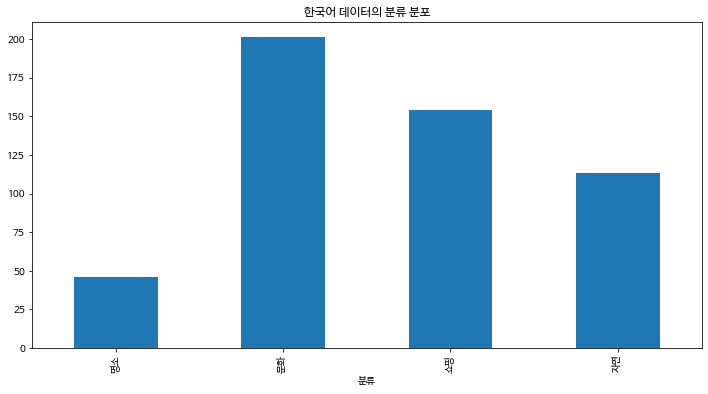

In [ ]:
# 전체 데이터에서 언어별 분류의 분포 확인하기 : 한국어
kind_ko = seoul_all_df[seoul_all_df['언어'] == '한국어'].groupby(seoul_all_df['분류'])

plt.figure(figsize=(12,6)) # 빈 캔버스 사이즈 지정
plt.rc('font', family='NanumBarunGothic') 
plt.title('한국어 데이터의 분류 분포')
kind_ko.size().plot(kind='bar')

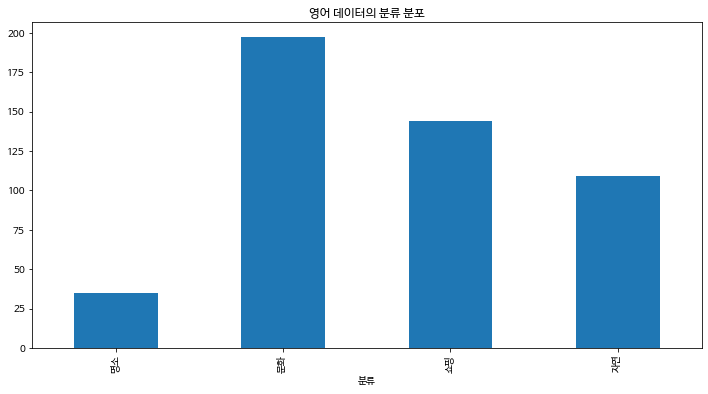

In [ ]:
# 전체 데이터에서 언어별 분류의 분포 확인하기 : 영어
kind_en = seoul_all_df[seoul_all_df['언어'] == 'ENGLISH'].groupby(seoul_all_df['분류'])

plt.figure(figsize=(12,6)) # 빈 캔버스 사이즈 지정
plt.rc('font', family='NanumBarunGothic') 
plt.title('영어 데이터의 분류 분포')
kind_en.size().plot(kind='bar')

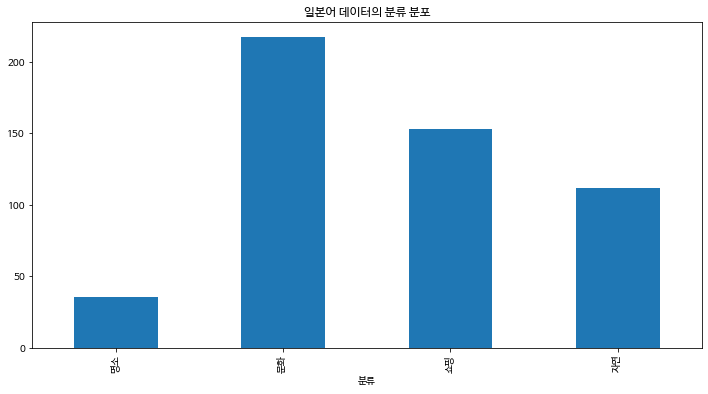

In [ ]:
# 전체 데이터에서 언어별 분류의 분포 확인하기 : 일본어
kind_ja = seoul_all_df[seoul_all_df['언어'] == '日本語'].groupby(seoul_all_df['분류'])

plt.figure(figsize=(12,6)) # 빈 캔버스 사이즈 지정
plt.rc('font', family='NanumBarunGothic') 
plt.title('일본어 데이터의 분류 분포')
kind_ja.size().plot(kind='bar')

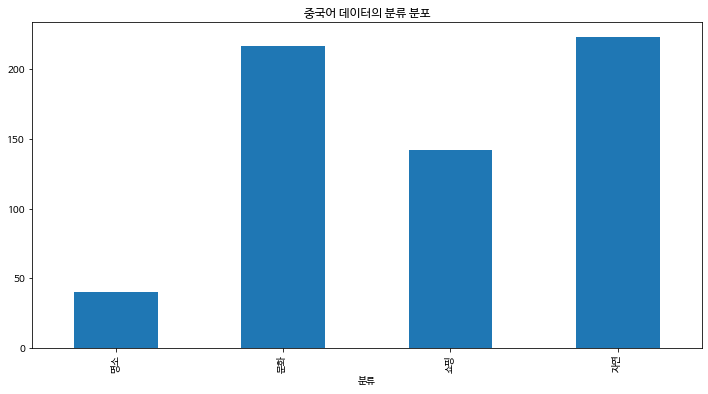

In [ ]:
# 전체 데이터에서 언어별 분류의 분포 확인하기 : 중국어
kind_cn = seoul_all_df[seoul_all_df['언어'] == '汉语'].groupby(seoul_all_df['분류'])

plt.figure(figsize=(12,6)) # 빈 캔버스 사이즈 지정
plt.rc('font', family='NanumBarunGothic') 
plt.title('중국어 데이터의 분류 분포')
kind_cn.size().plot(kind='bar')

### 언어별 구 분포 그래프
- 대부분 종로구, 중구에 가장 많이 분포되어 있음
- 구가 'error'인 경우, 주소가 없거나 바르게 입력되지 않거나 언어가 잘못된 경우 등으로 확인됨

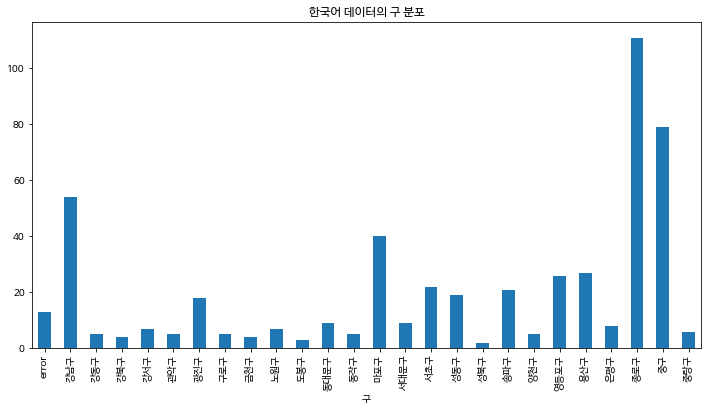

In [ ]:
# 전체 데이터에서 언어별 구의 분포 확인하기 : 한국어
gu_ko = seoul_all_df[seoul_all_df['언어'] == '한국어'].groupby(seoul_all_df['구'])

plt.figure(figsize=(12,6)) # 빈 캔버스 사이즈 지정
plt.rc('font', family='NanumBarunGothic') 
plt.title('한국어 데이터의 구 분포')
gu_ko.size().plot(kind='bar')

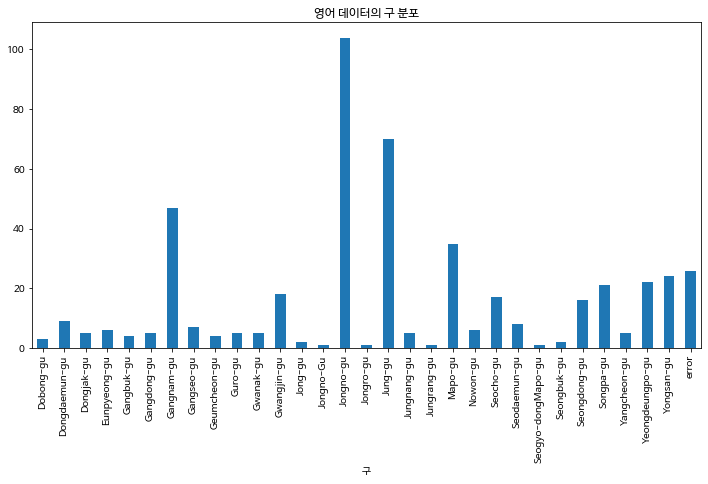

In [ ]:
# 전체 데이터에서 언어별 구의 분포 확인하기 : 영어
gu_en = seoul_all_df[seoul_all_df['언어'] == 'ENGLISH'].groupby(seoul_all_df['구'])

plt.figure(figsize=(12,6)) # 빈 캔버스 사이즈 지정
plt.rc('font', family='NanumBarunGothic') 
plt.title('영어 데이터의 구 분포')
gu_en.size().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 21306 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 24195 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 28179 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 21306 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 24195 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 28179 missing from current font.



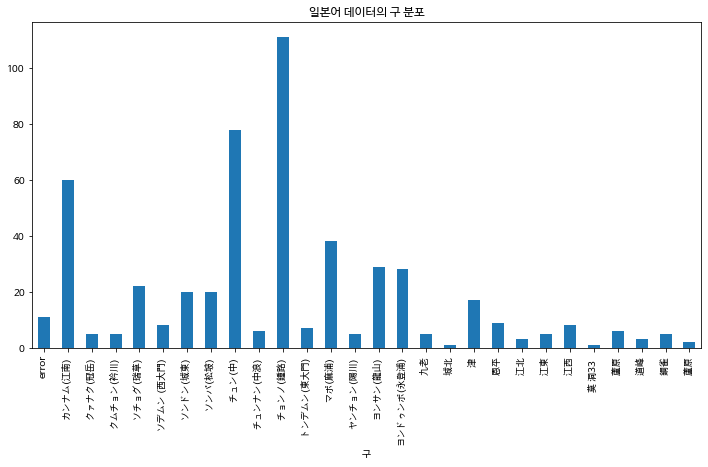

In [ ]:
# 전체 데이터에서 언어별 구의 분포 확인하기 : 일본어
gu_ja = seoul_all_df[seoul_all_df['언어'] == '日本語'].groupby(seoul_all_df['구'])

plt.figure(figsize=(12,6)) # 빈 캔버스 사이즈 지정
plt.rc('font', family='NanumBarunGothic') 
plt.title('일본어 데이터의 구 분포')
gu_ja.size().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 21306 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 19996 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 38376 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 24191 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 38108 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 40857 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 21306 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

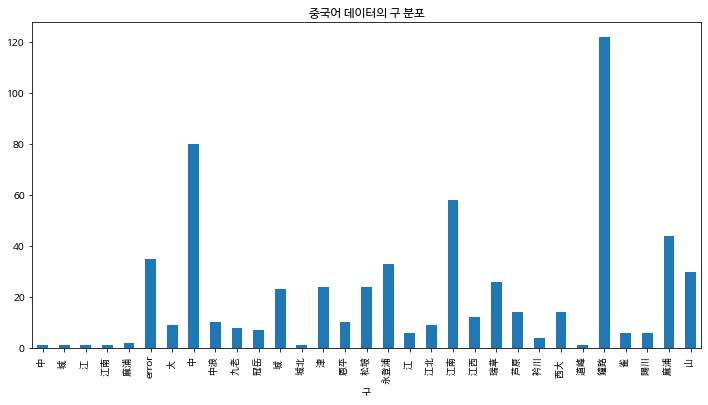

In [ ]:
# 전체 데이터에서 언어별 구의 분포 확인하기
gu_cn = seoul_all_df[seoul_all_df['언어'] == '汉语'].groupby(seoul_all_df['구'])

plt.figure(figsize=(12,6)) # 빈 캔버스 사이즈 지정
plt.rc('font', family='NanumBarunGothic') 
plt.title('중국어 데이터의 구 분포')
gu_cn.size().plot(kind='bar') # 한자 출력에 오류가 있어 보임

### 관광지 유형별 구의 분포

In [ ]:
seoul_total_url = '/content/drive/MyDrive/빅데이터통계분석/data/seoul_total.xlsx'
seoul_total_df = pd.read_excel(seoul_total_url)
del seoul_total_df['Unnamed: 0']

In [ ]:
for i in range(len(seoul_total_df)-1):
  if seoul_total_df['상호명'][i] ==  seoul_total_df['상호명'][i+1]:
    seoul_total_df = seoul_total_df.drop(i)

In [ ]:
len(seoul_total_df)

1896

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go

df2 = seoul_total_df.groupby(by=['시군구명', '분류']).count().reset_index()

data1 = go.Bar(x=df2[df2['분류'] == '명소'].시군구명, y=df2[df2['분류'] == '명소'].상호명, name='명소')
data2 = go.Bar(x=df2[df2['분류'] == '문화'].시군구명, y=df2[df2['분류'] == '문화'].상호명, name='문화')
data3 = go.Bar(x=df2[df2['분류'] == '자연'].시군구명, y=df2[df2['분류'] == '자연'].상호명, name='자연')
data4 = go.Bar(x=df2[df2['분류'] == '쇼핑'].시군구명, y=df2[df2['분류'] == '쇼핑'].상호명, name='쇼핑')

data = [data1, data2, data3, data4]
layout = go.Layout(title='관광지 유형별 전체 구 분포')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)